In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import csv
data = '/home/joe/data/covid19/summary'
#data = '/run/user/1000/gvfs/smb-share:server=majesty.local,share=filesjoe/data/summary'
df = pd.read_csv(data)

df = df.astype({'country':'string','cases':'int32', 'deaths':'int32'})
df['date'] = pd.to_datetime(df['date'],infer_datetime_format=True)
df = df.sort_values(by=['date'])
df = df.reset_index()
df = df.drop(['index'],axis=1)

In [3]:
df.head()

,date,country,cases,deaths
0,2020-01-27,china,2741,80
1,2020-01-28,china,4537,106
2,2020-01-29,china,5997,132
3,2020-01-30,china,7736,170
4,2020-01-31,china,9720,213


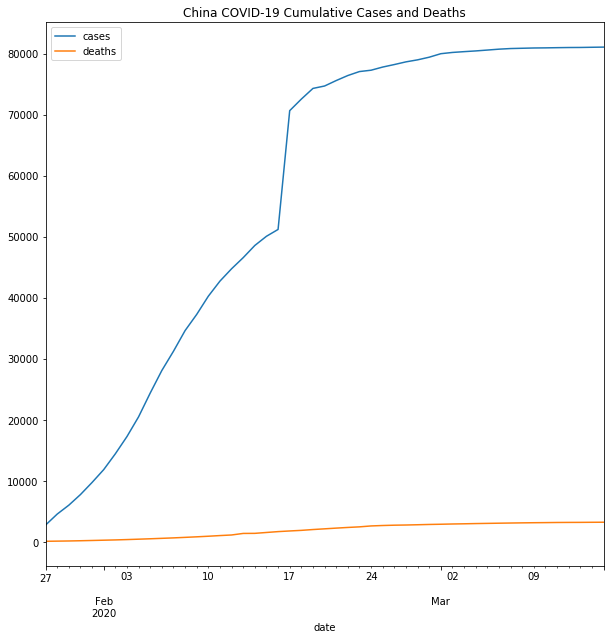

In [4]:
df.plot(x='date',y=['cases','deaths'],kind='line',
        figsize=(10,10),title="China COVID-19 Cumulative Cases and Deaths")


Text(0, 0.5, 'cumulative deaths')

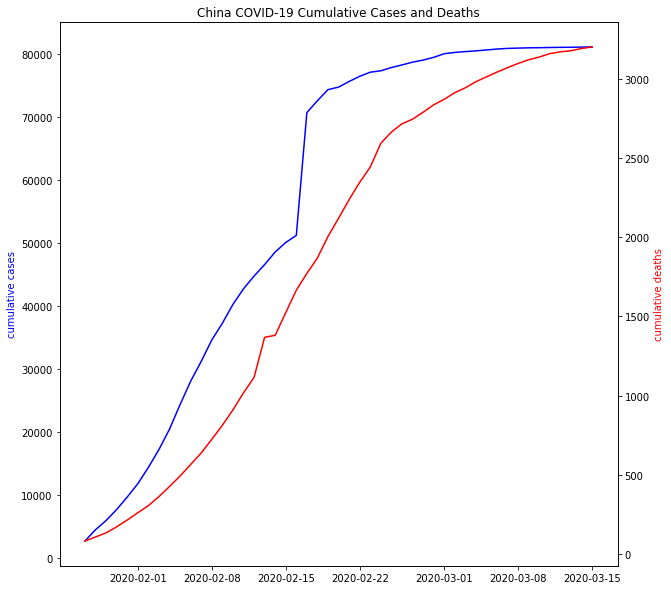

In [22]:
fig = plt.figure()
fig.set_size_inches(10,10)

ax1 = fig.add_subplot(111)
ax1.plot(df['date'],df['cases'], color='b')
ax1.set_ylabel('cumulative cases', color='b')
ax1.set_title("China COVID-19 Cumulative Cases and Deaths")

ax2 = ax1.twinx()
ax2.plot(df['date'],df['deaths'],'r')
ax2.set_ylabel('cumulative deaths', color='r')

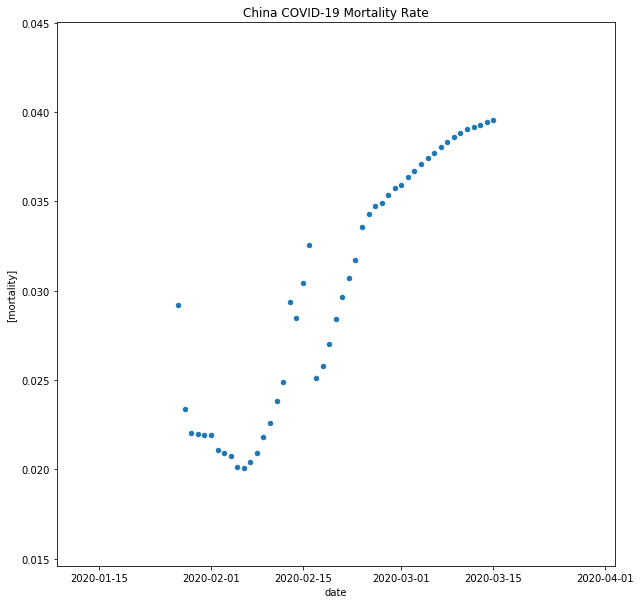

In [8]:
df.plot(x='date',y=['mortality'],kind='scatter',
        figsize=(10,10),title="China COVID-19 Mortality Rate")


In [23]:
df['new cases'] = df.cases - df.cases.shift(1)
df['new deaths'] = df.deaths - df.deaths.shift(1)
#df = df.fillna(0)
df.corr()

,cases,deaths,mortality,new cases,new deaths
cases,1.000000,0.969542,0.843466,-0.268616,-0.094946
deaths,0.969542,1.000000,0.939989,-0.380774,-0.258748
mortality,0.843466,0.939989,1.000000,-0.477156,-0.336352
new cases,-0.268616,-0.380774,-0.477156,1.000000,0.241937
new deaths,-0.094946,-0.258748,-0.336352,0.241937,1.000000


Text(0, 0.5, 'new deaths')

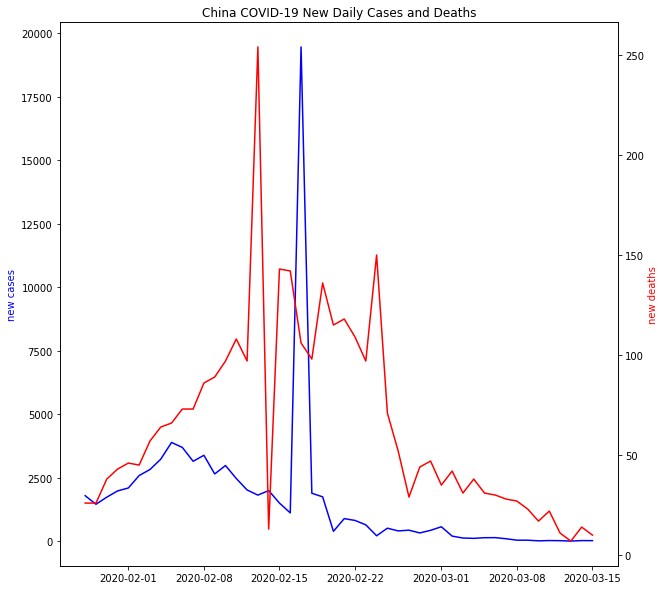

In [20]:
figB = plt.figure()
figB.set_size_inches(10,10)

axB1 = figB.add_subplot(111)
axB1.plot(df['date'],df['new cases'], color='b')
axB1.set_ylabel('new cases', color='b')
axB1.set_title("China COVID-19 New Daily Cases and Deaths")

axB2 = axB1.twinx()
axB2.plot(df['date'],df['new deaths'], color='r')
axB2.set_ylabel('new deaths', color='r')